# Práctica 4: Agrupación y evaluación de resultados
Duración: 2 sesiones

Objetivo: El objetivo de esta práctica es introducir los conceptos básicos de agrupación (clustering) de datos y los algoritmos más importantes. Asimismo, se estudiarán los conceptos básicos de evaluación y comparación de resultados. Se
tratará, por tanto, de ejecutar diferentes modelos y comparar sus resultados.

Implemente los siguientes ejercicios:

1. Ejecute los programas ejemplo facilitados junto con la práctica para familiarizarse con los conceptos de los
algoritmos de clustering de scikit-learn.
2. Seleccione al menos cinco problemas de los disponibles en lo repositorios usados en las prácticas anteriores. Use
problemas que solo contengan atributos numéricos. No olvide eliminar la información de la clase antes de
ejecutar los algoritmos.
3. Seleccione el algoritmo de clustering k-means.
4. Selecciones los algoritmos de clustering jerárquicos single link, complete link y average link.
5. Implemente la medida de evaluación de la calidad de un método de agrupación basada en la correlación entre la
matriz de incidencia y la de proximidad. Seleccione una de las medidas de evaluación no supervisada disponibles
en scikit-learn.
6. Para cada uno de los problemas seleccionados realice las siguientes tareas:
7. Ejecute el algoritmo k-means y evalúe su rendimiento para un rango de valores alrededor del número conocido
de clases.
8. Ejecute los algoritmos jerárquicos y evalúe su rendimiento al nivel en el cual tengan el mismo número de grupos
que el número de clases del problema.
9. Implemente algoritmo particional bisecting k-means y compare sus resultados con el algoritmo k-means.
10. Usando la función para general datos de forma aleatoria (make_blobs) genere diversos grupos de datos y
compare de forma gráfica los algoritmos disponibles en scikit de forma similar a los ejemplos proporcionados.

In [ ]:
!pip install imbalanced-learn
!pip install fastcluster

In [ ]:
from scipy.io import arff
import pandas as pd
from imblearn.metrics import geometric_mean_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, svm, neighbors
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import f1_score

data = arff.loadarff('vehicle.arff')
df_vehicle = pd.DataFrame(data[0])

# Drop the last column
df_vehicle_clust = df_vehicle.iloc[:, :-2]

data = arff.loadarff('vowel.arff')
df_vowel = pd.DataFrame(data[0])

# Drop the last column
df_vowel_clust = df_vowel.iloc[:, :-2]

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

# Drop the last column
df_iris_clust = df_iris.iloc[:, :-2]

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

# Drop the last column
df_diabe_clust = df_diabe.iloc[:, :-2]

data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

# Drop the last column
df_iono_clust = df_iono.iloc[:, :-2]

In [ ]:
# Seleccione el algoritmo de clustering k-means.

from sklearn.cluster import KMeans

In [ ]:
# Selecciones los algoritmos de clustering jerárquicos single link, complete link y average link.

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [ ]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import fastcluster as fc
import numpy as np
from scipy.cluster.hierarchy import cophenet

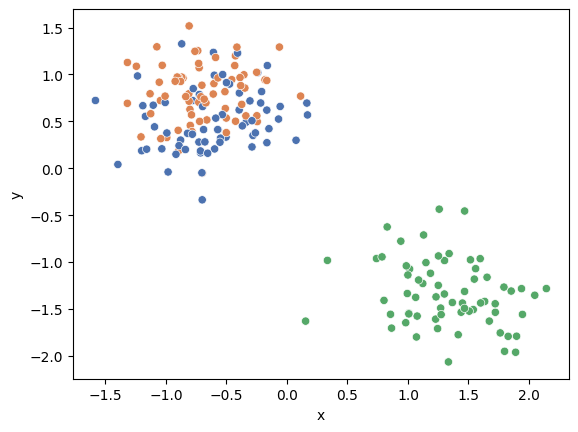

Coeficiente de copehenet : 0.9415129817325963


In [ ]:
centers = 3
X_Synth1, true_labels = make_blobs(n_samples=200, centers=centers, random_state=5)
X_Synth1 = StandardScaler().fit_transform(X_Synth1)
sns.scatterplot(x=[X[0] for X in X_Synth1],
                y=[X[1] for X in X_Synth1],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

X = X_Synth1  # Original data (1000 observations)
Z = fc.linkage_vector(X)         # Clustering

orign_dists = fc.pdist(X)  # Matrix of original distances between observations
cophe_dists = cophenet(Z)  # Matrix of cophenetic distances between observations

# What I really want at the end of the day is
corr_coef = np.corrcoef(orign_dists, cophe_dists)[0,1]
print(f'Coeficiente de copehenet : {corr_coef}')

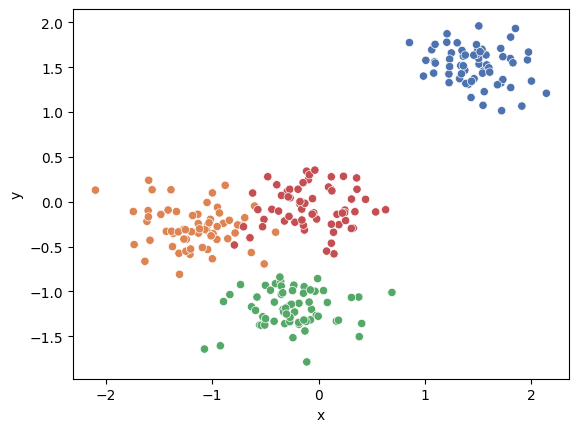

Coeficiente de copehenet : 0.8878952908943721


In [ ]:
centers = 4
X_Synth2, true_labels = make_blobs(n_samples=250, centers=centers, random_state=1)
X_Synth2 = StandardScaler().fit_transform(X_Synth2)
sns.scatterplot(x=[X[0] for X in X_Synth2],
                y=[X[1] for X in X_Synth2],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

X = X_Synth2  # Original data (1000 observations)
Z = fc.linkage_vector(X)         # Clustering

orign_dists = fc.pdist(X)  # Matrix of original distances between observations
cophe_dists = cophenet(Z)  # Matrix of cophenetic distances between observations

# What I really want at the end of the day is
corr_coef = np.corrcoef(orign_dists, cophe_dists)[0,1]
print(f'Coeficiente de copehenet : {corr_coef}')

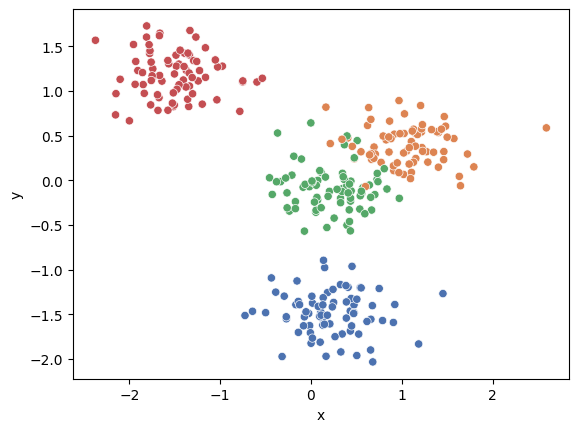

Coeficiente de copehenet : 0.8321447859230365


In [ ]:
centers = 4
X_Synth3, true_labels = make_blobs(n_samples=300, centers=centers, random_state=2)
X_Synth3 = StandardScaler().fit_transform(X_Synth3)
sns.scatterplot(x=[X[0] for X in X_Synth3],
                y=[X[1] for X in X_Synth3],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

X = X_Synth3  # Original data (1000 observations)
Z = fc.linkage_vector(X)         # Clustering

orign_dists = fc.pdist(X)  # Matrix of original distances between observations
cophe_dists = cophenet(Z)  # Matrix of cophenetic distances between observations

# What I really want at the end of the day is
corr_coef = np.corrcoef(orign_dists, cophe_dists)[0,1]
print(f'Coeficiente de copehenet : {corr_coef}')

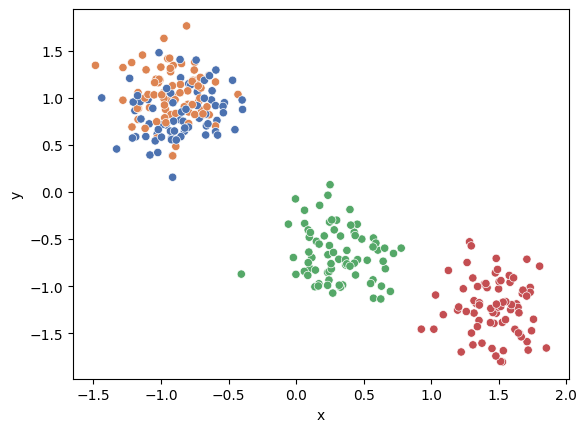

Coeficiente de copehenet : 0.8886435199601375


In [ ]:
centers = 4
X_Synth4, true_labels = make_blobs(n_samples=300, centers=centers, random_state=5)
X_Synth4 = StandardScaler().fit_transform(X_Synth4)
sns.scatterplot(x=[X[0] for X in X_Synth4],
                y=[X[1] for X in X_Synth4],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

X = X_Synth4  # Original data (1000 observations)
Z = fc.linkage_vector(X)         # Clustering

orign_dists = fc.pdist(X)  # Matrix of original distances between observations
cophe_dists = cophenet(Z)  # Matrix of cophenetic distances between observations

# What I really want at the end of the day is
corr_coef = np.corrcoef(orign_dists, cophe_dists)[0,1]
print(f'Coeficiente de copehenet : {corr_coef}')

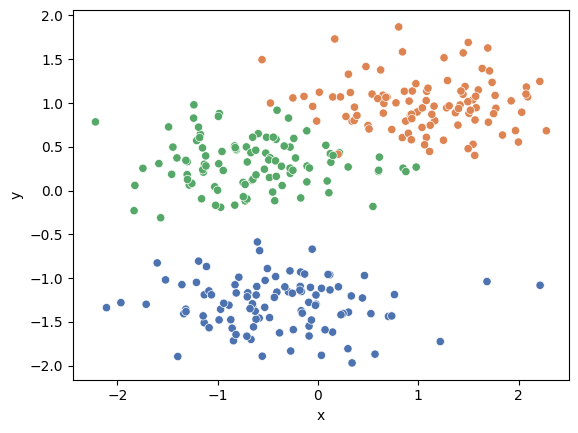

Coeficiente de copehenet : 0.6037121514113221


In [ ]:
centers = 3
X_Synth5, true_labels = make_blobs(n_samples=300, centers=centers, random_state=2)
X_Synth5 = StandardScaler().fit_transform(X_Synth5)
sns.scatterplot(x=[X[0] for X in X_Synth5],
                y=[X[1] for X in X_Synth5],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

X = X_Synth5  # Original data (1000 observations)
Z = fc.linkage_vector(X)         # Clustering

orign_dists = fc.pdist(X)  # Matrix of original distances between observations
cophe_dists = cophenet(Z)  # Matrix of cophenetic distances between observations

# What I really want at the end of the day is
corr_coef = np.corrcoef(orign_dists, cophe_dists)[0,1]
print(f'Coeficiente de copehenet : {corr_coef}')

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import BisectingKMeans

def runClusteringAndEval(x, perfTable, dataset_str, k):
    clf = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(x)
    score = silhouette_score(x, clf.labels_)
    perfTable[dataset_str][k-2] = score

def runBisectingAndEval(x,  perfTable, dataset_str, k):
    clf = BisectingKMeans(n_clusters=k, random_state=0, n_init="auto", bisecting_strategy='largest_cluster').fit(x)
    score = silhouette_score(x, clf.labels_)
    perfTable[dataset_str][k-2] = score


In [ ]:
perfTable = {
    "Diabetes": [0,0,0],
    "Iris": [0,0,0],
    "Ionosphere": [0,0,0],
    "Vehicle": [0,0,0],
    "Vowel": [0,0,0],
    "Synth1": [0,0,0],
    "Synth2": [0,0,0],
    "Synth3": [0,0,0],
    "Synth4": [0,0,0],
    "Synth5": [0,0,0],
}
perfTableBis = {
    "Diabetes": [0,0,0],
    "Iris": [0,0,0],
    "Ionosphere": [0,0,0],
    "Vehicle": [0,0,0],
    "Vowel": [0,0,0],
    "Synth1": [0,0,0],
    "Synth2": [0,0,0],
    "Synth3": [0,0,0],
    "Synth4": [0,0,0],
    "Synth5": [0,0,0],
}

In [ ]:
nOfClusters = [2,3,4]

for k in nOfClusters:
    runClusteringAndEval(df_diabe.iloc[:, 0:-2].values, perfTable, "Diabetes", k)
    runClusteringAndEval(df_iris.iloc[:, 0:-2].values, perfTable, "Iris", k)
    runClusteringAndEval(df_iono.iloc[:, 0:-2].values, perfTable, "Ionosphere", k)
    runClusteringAndEval(df_vehicle.iloc[:, 0:-2].values, perfTable, "Vehicle", k)
    runClusteringAndEval(df_vowel.iloc[:, 0:-2].values, perfTable, "Vowel", k)
    runClusteringAndEval(X_Synth1, perfTable, "Synth1", k)
    runClusteringAndEval(X_Synth2, perfTable, "Synth2", k)
    runClusteringAndEval(X_Synth3, perfTable, "Synth3", k)
    runClusteringAndEval(X_Synth4, perfTable, "Synth4", k)
    runClusteringAndEval(X_Synth5, perfTable, "Synth5", k)

df = pd.DataFrame(data=perfTable).transpose().rename(columns = {0: "k = 2", 1: "k = 3", 2: "k = 4"})
print(df.style.to_latex())
print(df)

\begin{tabular}{lrrr}
 & k = 2 & k = 3 & k = 4 \\
Diabetes & 0.575925 & 0.521643 & 0.468575 \\
Iris & 0.684239 & 0.551906 & 0.508085 \\
Ionosphere & 0.301895 & 0.293677 & 0.310069 \\
Vehicle & 0.675009 & 0.644338 & 0.528691 \\
Vowel & 0.471438 & 0.351358 & 0.328645 \\
Synth1 & 0.773672 & 0.621402 & 0.342384 \\
Synth2 & 0.696027 & 0.518930 & 0.630201 \\
Synth3 & 0.602584 & 0.629318 & 0.576891 \\
Synth4 & 0.731490 & 0.718279 & 0.501529 \\
Synth5 & 0.488185 & 0.537789 & 0.499956 \\
\end{tabular}

               k = 2     k = 3     k = 4
Diabetes    0.575925  0.521643  0.468575
Iris        0.684239  0.551906  0.508085
Ionosphere  0.301895  0.293677  0.310069
Vehicle     0.675009  0.644338  0.528691
Vowel       0.471438  0.351358  0.328645
Synth1      0.773672  0.621402  0.342384
Synth2      0.696027  0.518930  0.630201
Synth3      0.602584  0.629318  0.576891
Synth4      0.731490  0.718279  0.501529
Synth5      0.488185  0.537789  0.499956


In [ ]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [ ]:
def runHierarchClusteringCompleteAndEval(x, perfTable, dataset_str, k):
    clf = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(x)
    score = silhouette_score(x, clf.labels_)
    perfTable[dataset_str][k-2] = score

def runHierarchClusteringSingleAndEval(x, perfTable, dataset_str, k):
    clf = AgglomerativeClustering(n_clusters=k, linkage='single').fit(x)
    score = silhouette_score(x, clf.labels_)
    perfTable[dataset_str][k-2] = score

def runHierarchClusteringAverageAndEval(x, perfTable, dataset_str, k):
    clf = AgglomerativeClustering(n_clusters=k, linkage='average').fit(x)
    score = silhouette_score(x, clf.labels_)
    perfTable[dataset_str][k-2] = score

In [ ]:
perfTableComplete = {
    "Diabetes": [0,0,0],
    "Iris": [0,0,0],
    "Ionosphere": [0,0,0],
    "Vehicle": [0,0,0],
    "Vowel": [0,0,0],
    "Synth1": [0,0,0],
    "Synth2": [0,0,0],
    "Synth3": [0,0,0],
    "Synth4": [0,0,0],
    "Synth5": [0,0,0],
}

perfTableSingle = {
    "Diabetes": [0,0,0],
    "Iris": [0,0,0],
    "Ionosphere": [0,0,0],
    "Vehicle": [0,0,0],
    "Vowel": [0,0,0],
    "Synth1": [0,0,0],
    "Synth2": [0,0,0],
    "Synth3": [0,0,0],
    "Synth4": [0,0,0],
    "Synth5": [0,0,0],
}

perfTableAverage = {
    "Diabetes": [0,0,0],
    "Iris": [0,0,0],
    "Ionosphere": [0,0,0],
    "Vehicle": [0,0,0],
    "Vowel": [0,0,0],
    "Synth1": [0,0,0],
    "Synth2": [0,0,0],
    "Synth3": [0,0,0],
    "Synth4": [0,0,0],
    "Synth5": [0,0,0],
}

In [ ]:
nOfClusters = [2,3,4]

for k in nOfClusters:
    runHierarchClusteringCompleteAndEval(df_diabe.iloc[:, 0:-2].values, perfTableComplete, "Diabetes", k)
    runHierarchClusteringSingleAndEval(df_diabe.iloc[:, 0:-2].values, perfTableSingle, "Diabetes", k)
    runHierarchClusteringAverageAndEval(df_diabe.iloc[:, 0:-2].values, perfTableAverage, "Diabetes", k)

    runHierarchClusteringCompleteAndEval(df_iris.iloc[:, 0:-2].values, perfTableComplete, "Iris", k)
    runHierarchClusteringSingleAndEval(df_iris.iloc[:, 0:-2].values, perfTableSingle, "Iris", k)
    runHierarchClusteringAverageAndEval(df_iris.iloc[:, 0:-2].values, perfTableAverage, "Iris", k)

    runHierarchClusteringCompleteAndEval(df_iono.iloc[:, 0:-2].values, perfTableComplete, "Ionosphere", k)
    runHierarchClusteringSingleAndEval(df_iono.iloc[:, 0:-2].values, perfTableSingle, "Ionosphere", k)
    runHierarchClusteringAverageAndEval(df_iono.iloc[:, 0:-2].values, perfTableAverage, "Ionosphere", k)

    runHierarchClusteringCompleteAndEval(df_vehicle.iloc[:, 0:-2].values, perfTableComplete, "Vehicle", k)
    runHierarchClusteringSingleAndEval(df_vehicle.iloc[:, 0:-2].values, perfTableSingle, "Vehicle", k)
    runHierarchClusteringAverageAndEval(df_vehicle.iloc[:, 0:-2].values, perfTableAverage, "Vehicle", k)

    runHierarchClusteringCompleteAndEval(df_vowel.iloc[:, 0:-2].values, perfTableComplete, "Vowel", k)
    runHierarchClusteringSingleAndEval(df_vowel.iloc[:, 0:-2].values, perfTableSingle, "Vowel", k)
    runHierarchClusteringAverageAndEval(df_vowel.iloc[:, 0:-2].values, perfTableAverage, "Vowel", k)

    runHierarchClusteringCompleteAndEval(X_Synth1, perfTableComplete, "Synth1", k)
    runHierarchClusteringSingleAndEval(X_Synth1, perfTableSingle, "Synth1", k)
    runHierarchClusteringAverageAndEval(X_Synth1, perfTableAverage, "Synth1", k)

    runHierarchClusteringCompleteAndEval(X_Synth2, perfTableComplete, "Synth2", k)
    runHierarchClusteringSingleAndEval(X_Synth2, perfTableSingle, "Synth2", k)
    runHierarchClusteringAverageAndEval(X_Synth2, perfTableAverage, "Synth2", k)

    runHierarchClusteringCompleteAndEval(X_Synth3, perfTableComplete, "Synth3", k)
    runHierarchClusteringSingleAndEval(X_Synth3, perfTableSingle, "Synth3", k)
    runHierarchClusteringAverageAndEval(X_Synth3, perfTableAverage, "Synth3", k)

    runHierarchClusteringCompleteAndEval(X_Synth4, perfTableComplete, "Synth4", k)
    runHierarchClusteringSingleAndEval(X_Synth4, perfTableSingle, "Synth4", k)
    runHierarchClusteringAverageAndEval(X_Synth4, perfTableAverage, "Synth4", k)

    runHierarchClusteringCompleteAndEval(X_Synth5, perfTableComplete, "Synth5", k)
    runHierarchClusteringSingleAndEval(X_Synth5, perfTableSingle, "Synth5", k)
    runHierarchClusteringAverageAndEval(X_Synth5, perfTableAverage, "Synth5", k)

dfCom = pd.DataFrame(data=perfTableComplete).transpose().rename(columns = {0: "k = 2", 1: "k = 3", 2: "k = 4"})
dfSingle = pd.DataFrame(data=perfTableSingle).transpose().rename(columns = {0: "k = 2", 1: "k = 3", 2: "k = 4"})
dfAverage = pd.DataFrame(data=perfTableAverage).transpose().rename(columns = {0: "k = 2", 1: "k = 3", 2: "k = 4"})

print(dfCom.style.to_latex())
print(dfSingle.style.to_latex())
print(dfAverage.style.to_latex())

print(dfCom)
print(dfSingle)
print(dfAverage)

\begin{tabular}{lrrr}
 & k = 2 & k = 3 & k = 4 \\
Diabetes & 0.686856 & 0.659448 & 0.484497 \\
Iris & 0.502317 & 0.519135 & 0.519931 \\
Ionosphere & 0.231165 & 0.295554 & 0.302466 \\
Vehicle & 0.659211 & 0.630242 & 0.411219 \\
Vowel & 0.471215 & 0.346642 & 0.294638 \\
Synth1 & 0.773672 & 0.594088 & 0.337912 \\
Synth2 & 0.696027 & 0.482680 & 0.584967 \\
Synth3 & 0.602584 & 0.630421 & 0.508033 \\
Synth4 & 0.731490 & 0.718279 & 0.489719 \\
Synth5 & 0.441575 & 0.354706 & 0.488887 \\
\end{tabular}

\begin{tabular}{lrrr}
 & k = 2 & k = 3 & k = 4 \\
Diabetes & 0.807983 & 0.769820 & 0.755323 \\
Iris & 0.688105 & 0.531339 & 0.394442 \\
Ionosphere & 0.404295 & 0.347239 & 0.335609 \\
Vehicle & 0.221988 & -0.053588 & -0.058565 \\
Vowel & 0.108954 & 0.279996 & 0.319535 \\
Synth1 & 0.773672 & 0.649669 & 0.573733 \\
Synth2 & 0.696027 & 0.384906 & 0.324567 \\
Synth3 & 0.337089 & 0.084057 & 0.316375 \\
Synth4 & 0.731490 & 0.494491 & 0.651085 \\
Synth5 & 0.284330 & 0.103019 & 0.029887 \\
\end{tabular}



[]

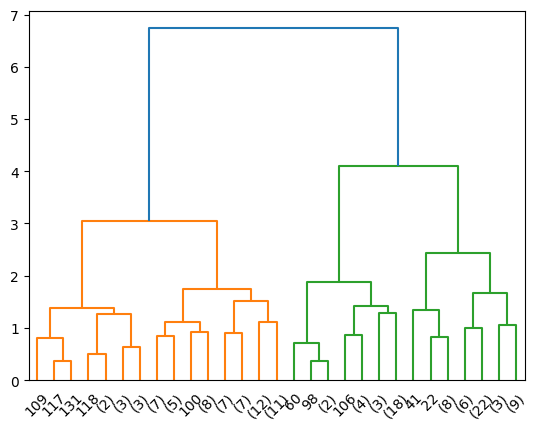

In [ ]:

clfIrisComplete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
clfIrisComplete.fit(df_iris.iloc[:, 0:-2].values)
clfIrisSingle = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
clfIrisSingle.fit(df_iris.iloc[:, 0:-2].values)
clfIrisAverage = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
clfIrisAverage.fit(df_iris.iloc[:, 0:-2].values)

clfSynth3Complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
clfSynth3Complete.fit(X_Synth3)
clfSynth3Single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
clfSynth3Single.fit(X_Synth3)
clfSynth3Average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
clfSynth3Average.fit(X_Synth3)

plot_dendrogram(clfIrisComplete, truncate_mode="level", p=4)
plt.plot()

[]

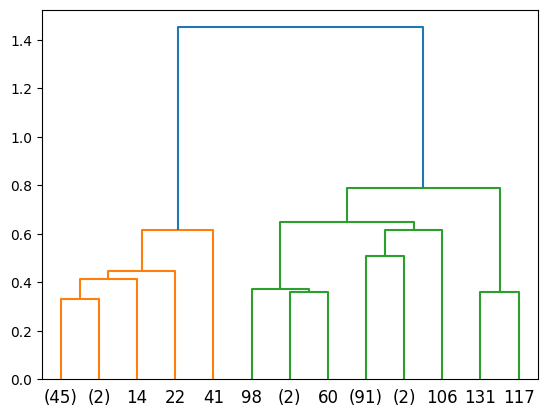

In [ ]:
plot_dendrogram(clfIrisSingle, truncate_mode="level", p=4)
plt.plot()

[]

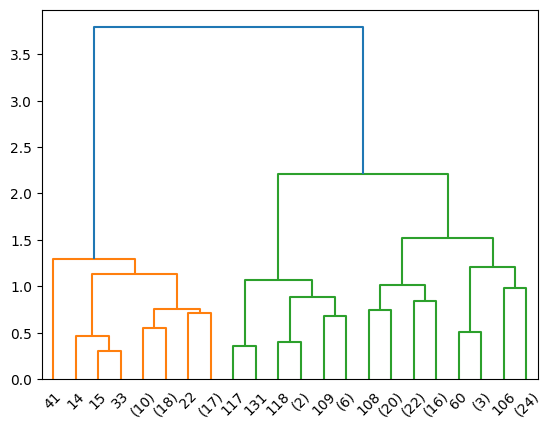

In [ ]:
plot_dendrogram(clfIrisAverage, truncate_mode="level", p=4)
plt.plot()

[]

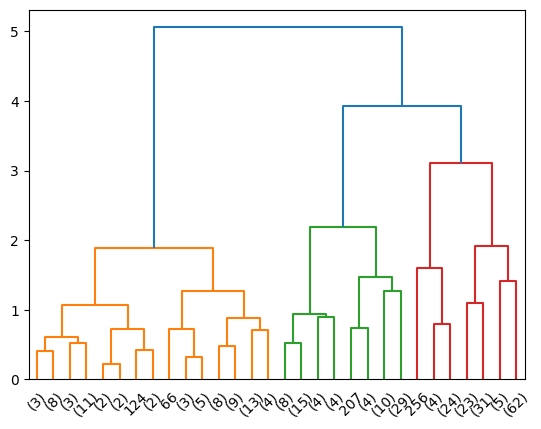

In [ ]:
plot_dendrogram(clfSynth3Complete, truncate_mode="level", p=4)
plt.plot()

[]

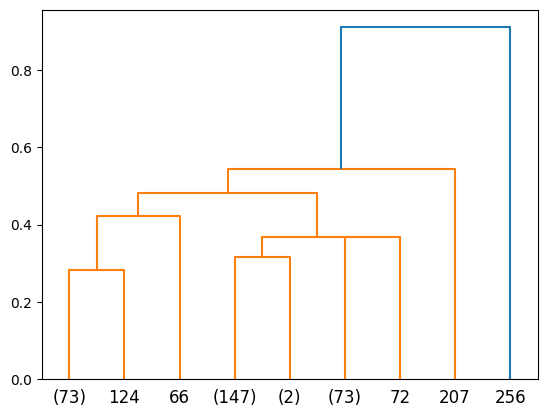

In [ ]:
plot_dendrogram(clfSynth3Single, truncate_mode="level", p=4)
plt.plot()

[]

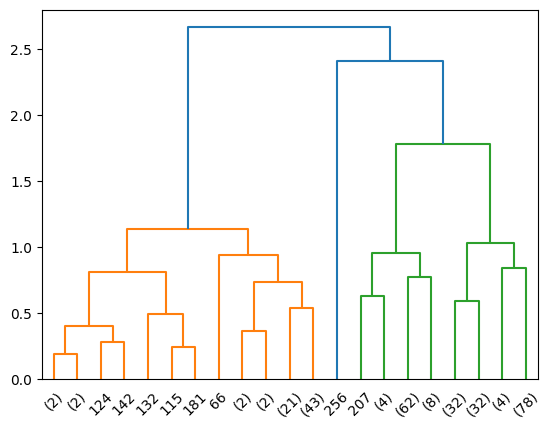

In [ ]:
plot_dendrogram(clfSynth3Average, truncate_mode="level", p=4)
plt.plot()

In [ ]:
nOfClusters = [2,3,4]

for k in nOfClusters:
    runBisectingAndEval(df_diabe.iloc[:, 0:-2].values, perfTableBis, "Diabetes", k)
    runBisectingAndEval(df_iris.iloc[:, 0:-2].values, perfTableBis, "Iris", k)
    runBisectingAndEval(df_iono.iloc[:, 0:-2].values, perfTableBis, "Ionosphere", k)
    runBisectingAndEval(df_vehicle.iloc[:, 0:-2].values, perfTableBis, "Vehicle", k)
    runBisectingAndEval(df_vowel.iloc[:, 0:-2].values, perfTableBis, "Vowel", k)
    runBisectingAndEval(X_Synth1, perfTableBis, "Synth1", k)
    runBisectingAndEval(X_Synth2, perfTableBis, "Synth2", k)
    runBisectingAndEval(X_Synth3, perfTableBis, "Synth3", k)
    runBisectingAndEval(X_Synth4, perfTableBis, "Synth4", k)
    runBisectingAndEval(X_Synth5, perfTableBis, "Synth5", k)

df = pd.DataFrame(data=perfTableBis).transpose().rename(columns = {0: "k = 2", 1: "k = 3", 2: "k = 4"})
print(df.style.to_latex())
print(df)

InvalidParameterError: The 'n_init' parameter of BisectingKMeans must be a str among {'auto'} or an int in the range [1, inf). Got 'int' instead.